# Project: Stears Data Analysis Assessment


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Profiling and Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction
Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

In [50]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [56]:
df = pd.read_csv('C:/Users/USER/Desktop/Stears Data Analysis Project/Stears_clean_data.csv')

# Data Profiling and Wrangling

A glimpse into the dataset

In [57]:
df.head()

,id,status,currency,country_name
0,1,failed,USD,United States
1,2,success,NGN,Nigeria
2,4,success,NGN,Nigeria
3,5,abandoned,NGN,Nigeria
4,7,success,NGN,Nigeria


In [58]:
df.tail()

,id,status,currency,country_name
1956,3267,success,USD,United States
1957,3268,success,NGN,Nigeria
1958,3271,abandoned,USD,France
1959,3273,abandoned,NGN,Nigeria
1960,3276,success,NGN,Nigeria


# Quality Issues
country_code and country_name have missing values
Empty/Null values are stored as null and should be identified and replaced.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3276 non-null   int64 
 1   status        3276 non-null   object
 2   currency      3276 non-null   object
 3   country_code  1960 non-null   object
 4   country_name  1962 non-null   object
dtypes: int64(1), object(4)
memory usage: 128.1+ KB


The above code gives a more detailed information about our data types.
All except the id (int64, an integer) variables (column) are object (string) data type.

In [22]:
df.isna().sum()

id                 0
status             0
currency           0
country_code    1316
country_name    1314
dtype: int64

From the above analysis, it is seen that there are a lot of missing values in the country_code column

In [23]:
df.shape

(3276, 5)

There are 3276 observations and 4 columns

In [32]:
len(df)

3276

# Exploratory Data Analysis and Visualization

<AxesSubplot:>

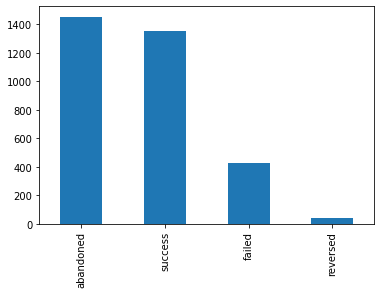

In [28]:
df['status'].value_counts().plot(kind='bar')

<AxesSubplot:>

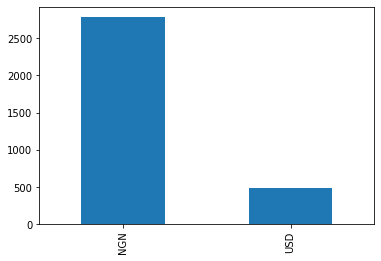

In [29]:
df['currency'].value_counts().plot(kind='bar')

<AxesSubplot:>

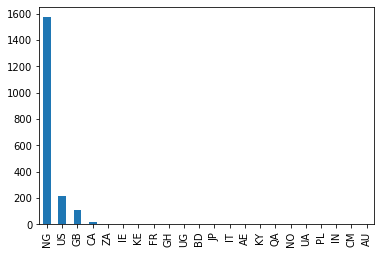

In [30]:
df['country_code'].value_counts().plot(kind='bar')

<AxesSubplot:>

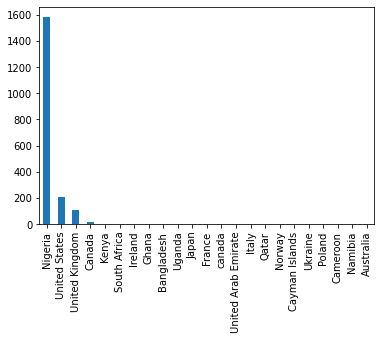

In [31]:
df['country_name'].value_counts().plot(kind='bar')

In [33]:
df.drop(['country_code'], axis=1, inplace=True)

In [49]:
df.head()

,id,status,currency,country_code,country_name,Unnamed: 5,Unnamed: 6,Summary,Unnamed: 8
0,3,0,NGN,NaN,NaN,NaN,NaN,Row Labels,Count of id
1,6,0,NGN,NaN,NaN,NaN,NaN,abandoned,1285
2,8,0,USD,NaN,NaN,NaN,NaN,failed,14
3,9,0,NGN,NaN,NaN,NaN,NaN,success,14
4,10,0,NGN,NaN,NaN,NaN,NaN,Grand Total,1313


In [47]:
df.status = np.where(df.status == "success", 1, 0)
df.status.value_counts()

0    1299
1      14
Name: status, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'title'

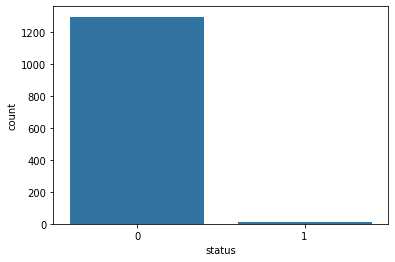

In [48]:
# plot a bar chart
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'status', color = base_color)
plt.title('Subscriber Status')
plt.xticks([0, 1], ['Not Successful', 'Successful'])
plt.xlabel('Status')
plt.ylabel('Number of Subscriber')

In [43]:
df.head()

,id,status,currency,country_name
0,1,0,USD,United States
1,2,1,NGN,Nigeria
2,3,0,NGN,NaN
3,4,1,NGN,Nigeria
4,5,0,NGN,Nigeria


<AxesSubplot:xlabel='currency,country_name'>

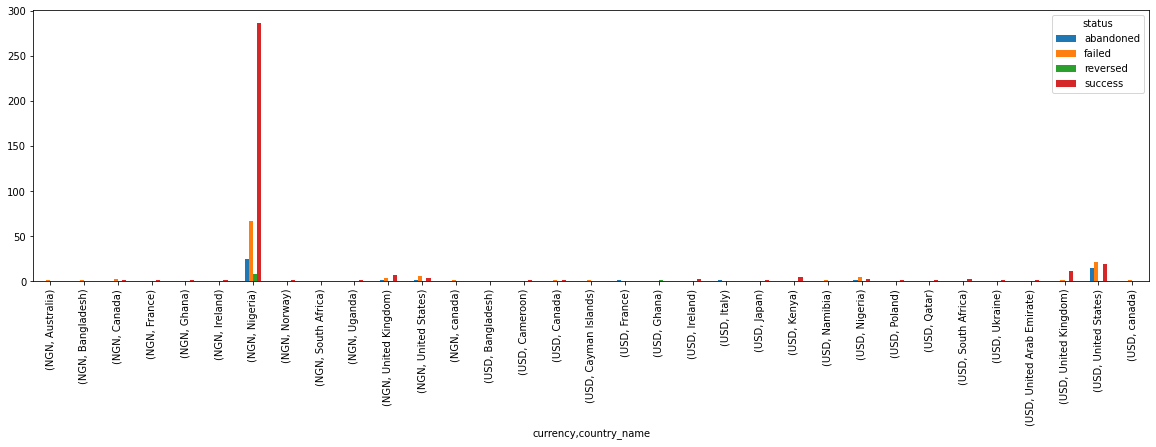

In [59]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

In [118]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [26]:
missing_value_df

NameError: name 'missing_value_df' is not defined

In [120]:
percent_not_missing = df.notnull().sum() * 100 / len(df)
not_missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_not_missing})

In [121]:
not_missing_value_df

,column_name,percent_missing
id,id,100.00000
status,status,100.00000
currency,currency,100.00000
country_code,country_code,59.82906
country_name,country_name,0.00000


From the above block of code, we can see that over 40 percent of the observations of the country_code column are missing.

In [24]:
df.nunique()

id              3276
status             4
currency           2
country_code      22
country_name      23
dtype: int64

There are only two unique currency in the data set, names NGN (Naira) and USD (Dollar)
However, there are 22 unique 

In [25]:
df.duplicated().sum()

0

There is no duplicate in our dataset

In [60]:
"""
import country_converter as coco
cc = coco.CountryConverter()

country_code = ['AE', 'AU', 'BD', 'CA', 'CM', 'FR', 'GB', 'GH', 'IE', 'IN', 'IT', 'JP', 'KE', 
                'KY', 'NA', 'NG', 'NO', 'NULL', 'PL', 'QA', 'UG', 'US', 'ZA']


# add country name by applying the convert method
df['country_name'] = df.country_code.apply(lambda x: coco.convert(names=df['country_code'], to = 'name_short'))

#country_names = cc.convert(names = country_code, to = 'name_short')
"""

"\nimport country_converter as coco\ncc = coco.CountryConverter()\n\ncountry_code = ['AE', 'AU', 'BD', 'CA', 'CM', 'FR', 'GB', 'GH', 'IE', 'IN', 'IT', 'JP', 'KE', \n                'KY', 'NA', 'NG', 'NO', 'NULL', 'PL', 'QA', 'UG', 'US', 'ZA']\n\n\n# add country name by applying the convert method\ndf['country_name'] = df.country_code.apply(lambda x: coco.convert(names=df['country_code'], to = 'name_short'))\n\n#country_names = cc.convert(names = country_code, to = 'name_short')\n"

In [61]:
"""
from datapackage import Package

package = Package('https://datahub.io/core/country-list/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())
"""

"\nfrom datapackage import Package\n\npackage = Package('https://datahub.io/core/country-list/datapackage.json')\n\n# print list of all resources:\nprint(package.resource_names)\n\n# print processed tabular data (if exists any)\nfor resource in package.resources:\n    if resource.descriptor['datahub']['type'] == 'derived/csv':\n        print(resource.read())\n"

In [ ]:
import country_converter as coco
cc = coco.CountryConverter()

country_code = ['AE', 'AU', 'BD', 'CA', 'CM', 'FR', 'GB', 'GH', 'IE', 'IN', 'IT', 'JP', 'KE', 
                'KY', 'NA', 'NG', 'NO', 'NULL', 'PL', 'QA', 'UG', 'US', 'ZA']


country_names = cc.convert(names = country_code, to = 'name_short')

NULL not found in regex


In [ ]:
country_names

['United Arab Emirates',
 'Australia',
 'Bangladesh',
 'Canada',
 'Cameroon',
 'France',
 'United Kingdom',
 'Ghana',
 'Ireland',
 'India',
 'Italy',
 'Japan',
 'Kenya',
 'Cayman Islands',
 'Namibia',
 'Nigeria',
 'Norway',
 'not found',
 'Poland',
 'Qatar',
 'Uganda',
 'United States',
 'South Africa']

In [ ]:
list1 = [country_code, country_names]

In [ ]:

df_country = pd.concat([pd.Series(x) for x in list1], axis=1)

In [ ]:
df_country

,0,1
0,AE,United Arab Emirates
1,AU,Australia
2,BD,Bangladesh
3,CA,Canada
4,CM,Cameroon
5,FR,France
6,GB,United Kingdom
7,GH,Ghana
8,IE,Ireland
9,IN,India


In [ ]:
df["country_name"] = df["country_code"].apply(lambda country_names: country_names)


In [ ]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,US
1,2,success,NGN,NG,NG
2,3,abandoned,NGN,NaN,NaN
3,4,success,NGN,NG,NG
4,5,abandoned,NGN,NG,NG


<AxesSubplot:xlabel='currency,country_name'>

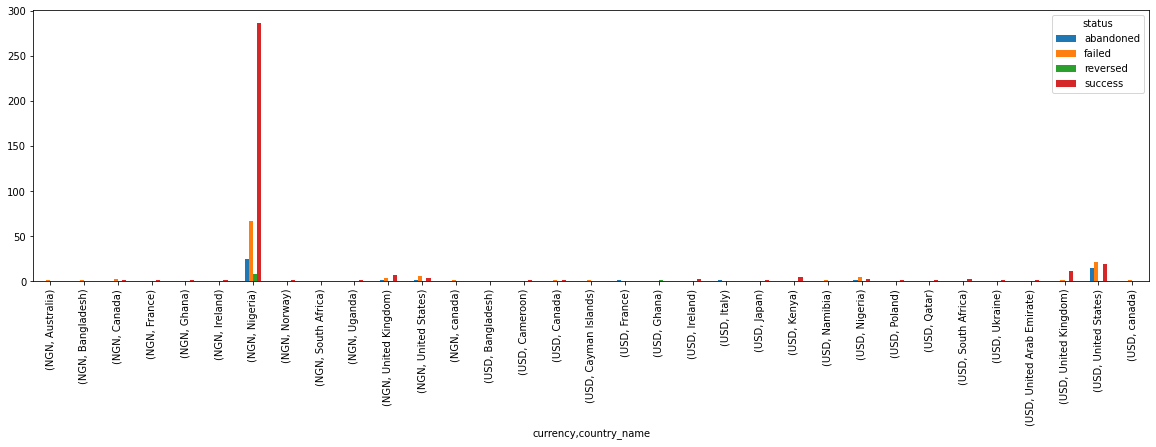

In [62]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

As shown above, there is no duplicate in our data.

In [ ]:
# A functionthat finds the median of the values it receives
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n%2] if n else None

values = [1, 2, 6]
print(median(values))

2


In [ ]:
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return np.median([s])

values = [1, 2, 6]
print(median(values))

2.0


In [ ]:
students = [("Allen Anderson", "Computer Science"),
            ("Edgar Einstein", "Engineering"),
            ("Farrah Finn", "Fine Arts")]
     

def add_new_student(students, name, major):
    students.append((name, major))

def update_student(students, index, name, major):
    students[index] = (name, major)

def find_students_by_name(students, name):
    return [student for student in students if name in student[0]]

def get_all_majors(students):
    return [student[1] for student in students]




In [ ]:
get_all_majors(students)

['Computer Science', 'Engineering', 'Fine Arts']

In [ ]:
get_all_majors(students)

['Computer Science', 'Engineering', 'Fine Arts']

In [ ]:
find_students_by_name(students, 'in') 

[('Edgar Einstein', 'Engineering'), ('Farrah Finn', 'Fine Arts')]

In [ ]:
#add_new_student("Farrah Finn", "Enoch", "Fine Arts")

In [ ]:
"""
Implement a group_by_owners function that:

Accepts a dictionary containing the file owner name for each file name.
Returns a dictionary containing a list of file names for each owner name, in any order.
For example, for dictionary {'Input.txt': 'Randy', 'Code.py': 'Stan', 'Output.txt': 'Randy'} the group_by_owners function should return {'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']}.


def group_by_owners(files):
    return None

if __name__ == "__main__":    
    files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
    }   
    print(group_by_owners(files))
"""

from collections import defaultdict


def group_by_owners(files):
    owners = defaultdict(list)
    for file, owner in files.items():
        owners[owner].append(file)
    return owners


files = {
    'Input.txt': 'Randy',
    'Code.py': 'Stan',
    'Output.txt': 'Randy'
}
print(group_by_owners(files))

defaultdict(<class 'list'>, {'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']})
